In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Spotify_data.csv')
df.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [4]:
df.columns

Index(['Unnamed: 0', 'Track Name', 'Artists', 'Album Name', 'Album ID',
       'Track ID', 'Popularity', 'Release Date', 'Duration (ms)', 'Explicit',
       'External URLs', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo'],
      dtype='object')

In [8]:
df=df.drop('Unnamed: 0',axis = True)
df

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,https://open.spotify.com/track/6AI3ezQ4o3HUoP6...,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,https://open.spotify.com/track/2HYFX63wP3otVIv...,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,https://open.spotify.com/track/7iabz12vAuVQYye...,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,https://open.spotify.com/track/331l3xABO0HMr1K...,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,https://open.spotify.com/track/48lxT5qJF0yYyf2...,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Tu Chahiye,"Pritam, Atif Aslam",Bajrangi Bhaijaan,4nZOPP0atfJbBlkedLYi7t,3aaiAWCet6sbfOfLSn3g7i,66,2015-07-07,272680,False,https://open.spotify.com/track/3aaiAWCet6sbfOf...,...,0.744,7,-5.817,1,0.0446,0.4030,0.000000,0.0853,0.415,134.068
223,"Aabaad Barbaad (From ""Ludo"")","Pritam, Arijit Singh","Aabaad Barbaad (From ""Ludo"")",1PzsfgcbPbiW7uflc9Zi5Z,0hFUtSsV2itYEUTZGj6w5H,58,2020-10-21,309103,False,https://open.spotify.com/track/0hFUtSsV2itYEUT...,...,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001
224,Jag Ghoomeya,"Vishal-Shekhar, Rahat Fateh Ali Khan, Irshad K...",Sultan,0tAi6H8acUKefYMIEuxcMA,4KCbZcshgibfJSCAkg87Lv,62,2016-05-31,281992,False,https://open.spotify.com/track/4KCbZcshgibfJSC...,...,0.565,11,-7.954,1,0.0347,0.4790,0.000002,0.1050,0.607,82.653
225,"Tumhe Kitna Pyaar Karte (From ""Bawaal"")","Mithoon, Arijit Singh, Manoj Muntashir","Tumhe Kitna Pyaar Karte (From ""Bawaal"")",20zQZcEhMLsDUn1LhPCEFY,03hJuEQpEQERrHpjcXKWzJ,65,2023-07-07,305232,False,https://open.spotify.com/track/03hJuEQpEQERrHp...,...,0.374,10,-9.849,0,0.0328,0.9240,0.000008,0.0840,0.388,101.855


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

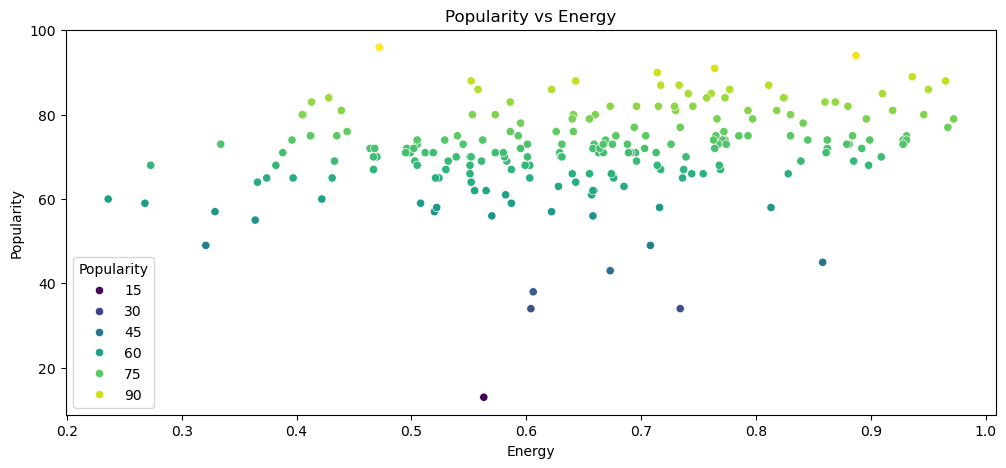

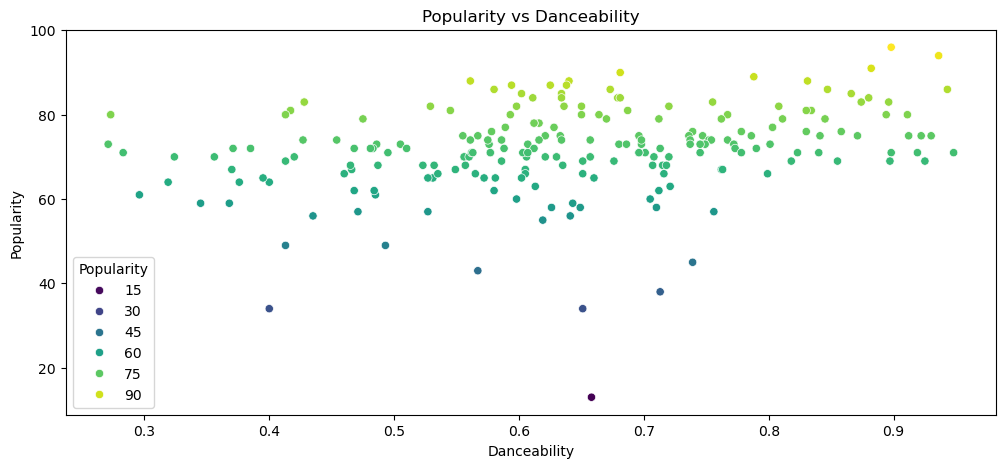

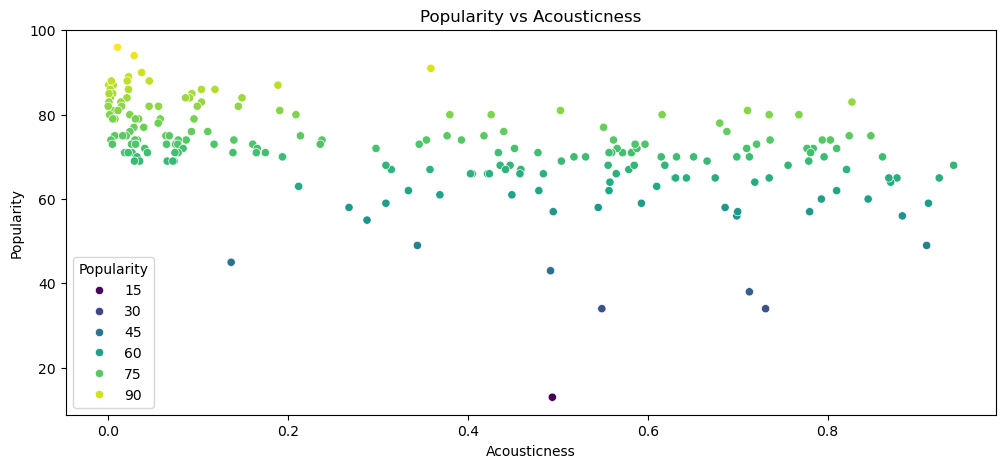

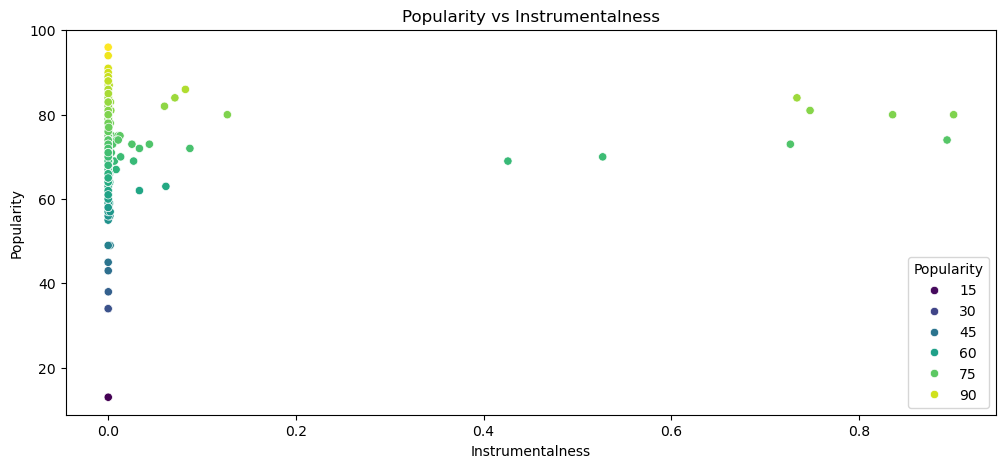

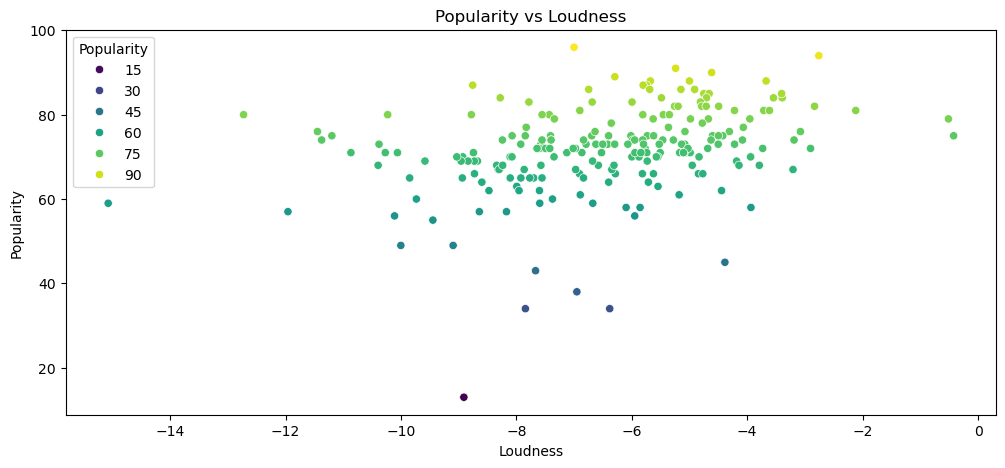

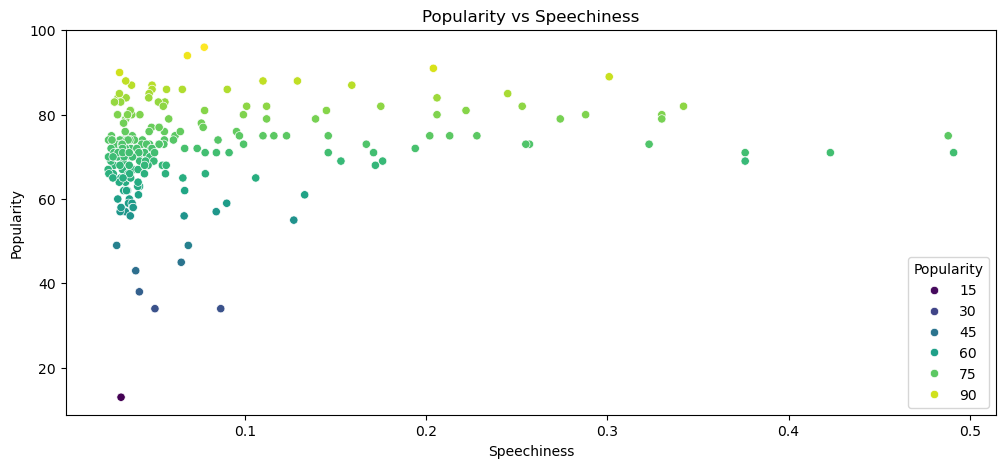

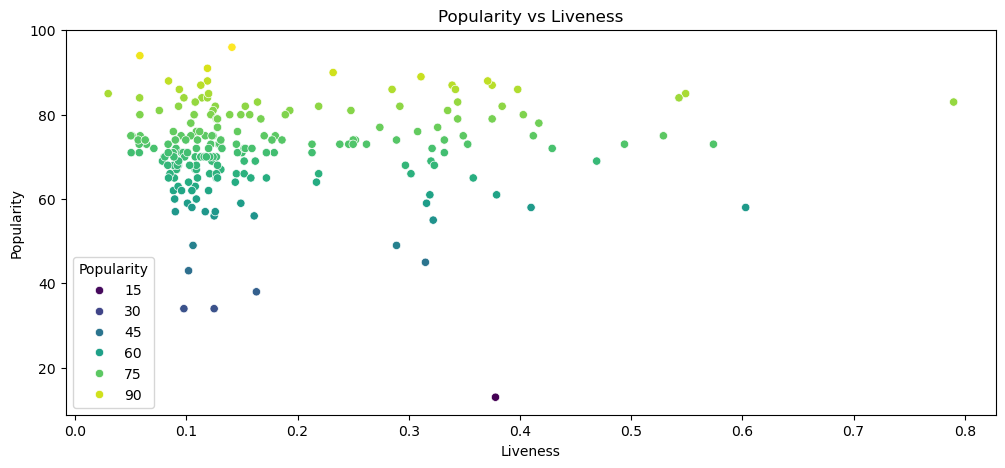

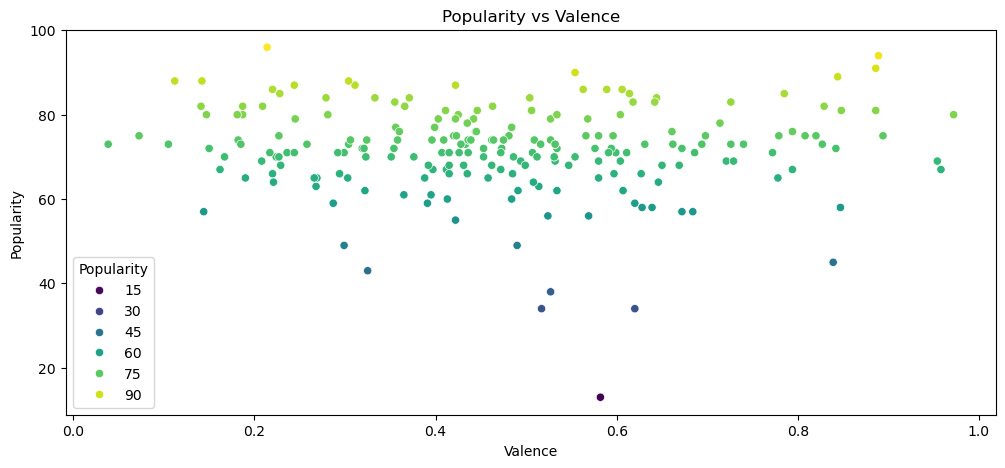

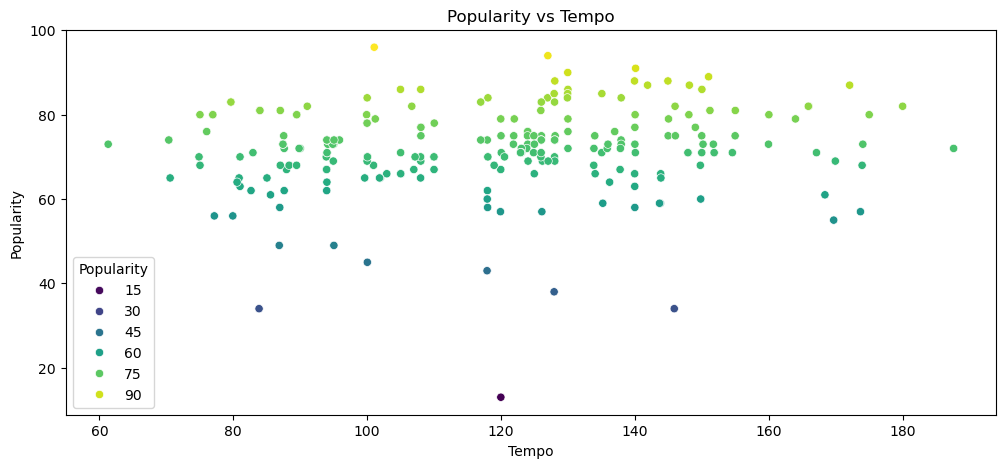

In [20]:
features = ['Energy','Danceability','Acousticness','Instrumentalness','Loudness','Speechiness','Liveness','Valence','Tempo']
for feature in features:
    plt.figure(figsize = (12,5))
    sns.scatterplot(data =df,x=feature,y='Popularity',palette='viridis',hue = 'Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()

In [21]:
numerical_columns = df.select_dtypes(include = ['float64', 'int64']).columns
numeric_data = df[numerical_columns]

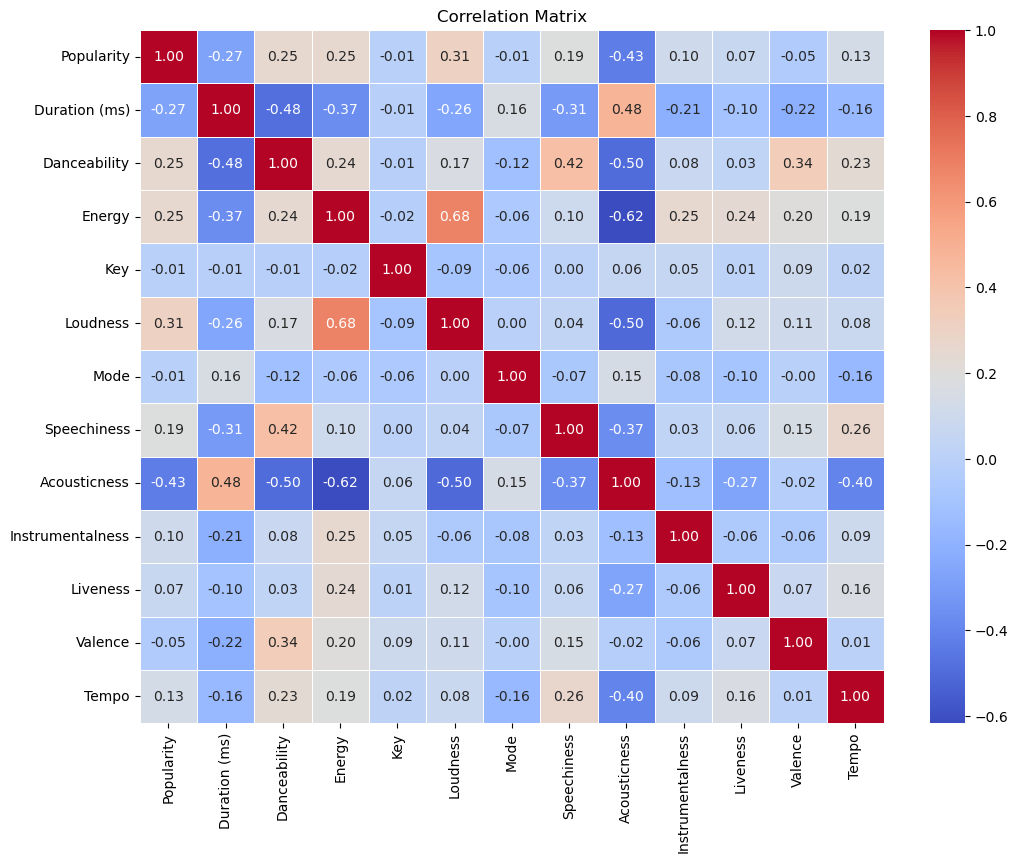

In [23]:
corr_matrix = numeric_data.corr()
plt.figure(figsize = (12,9))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


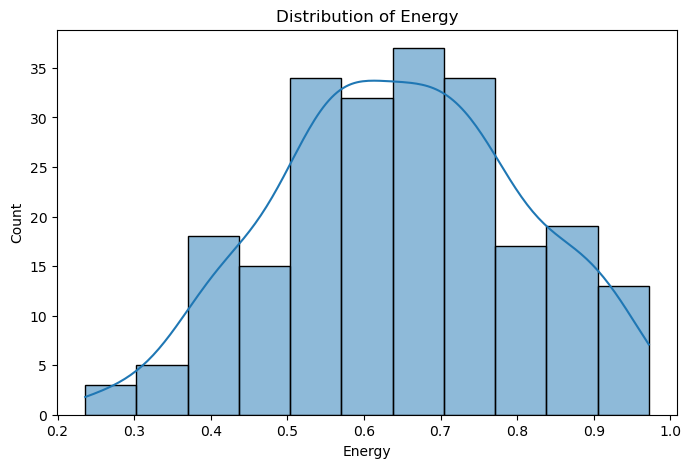

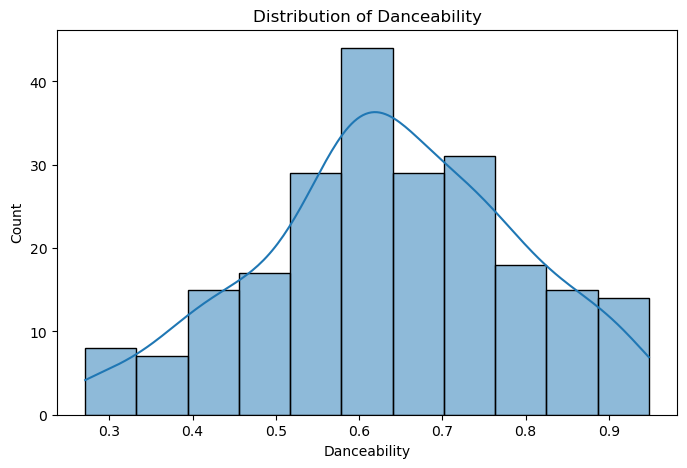

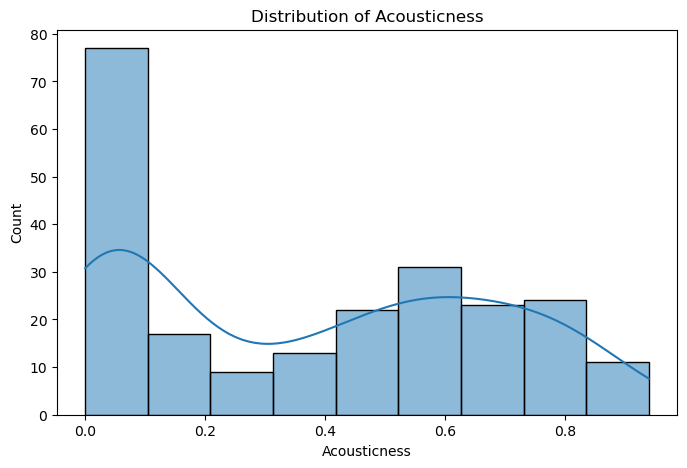

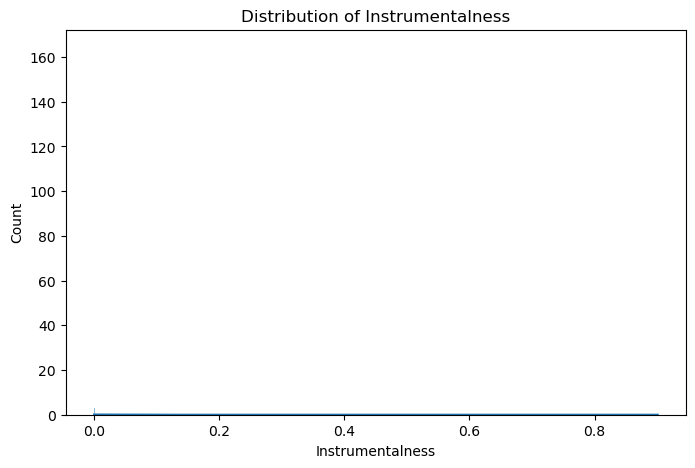

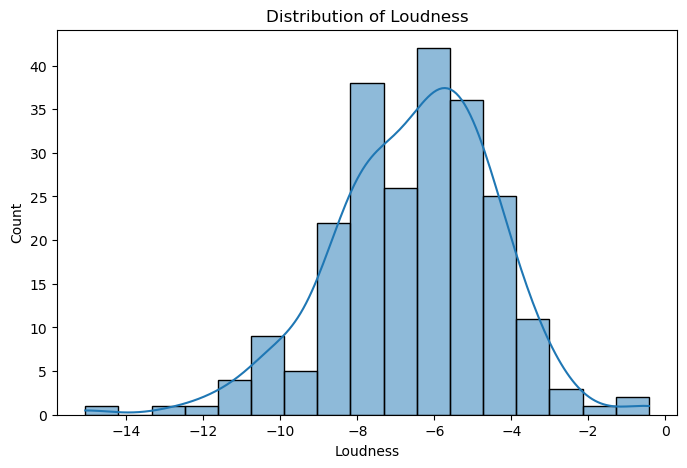

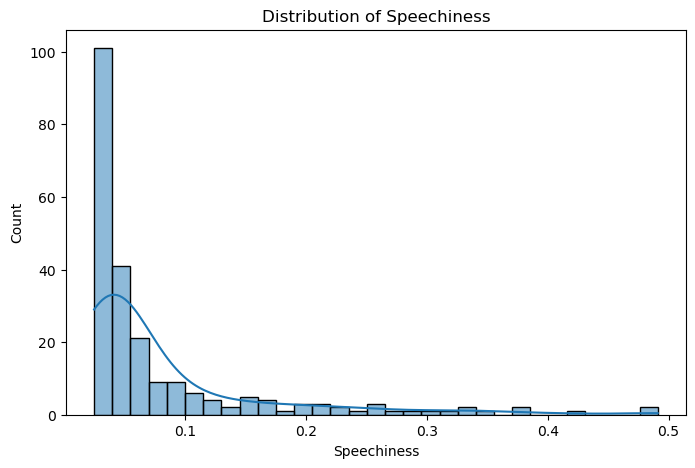

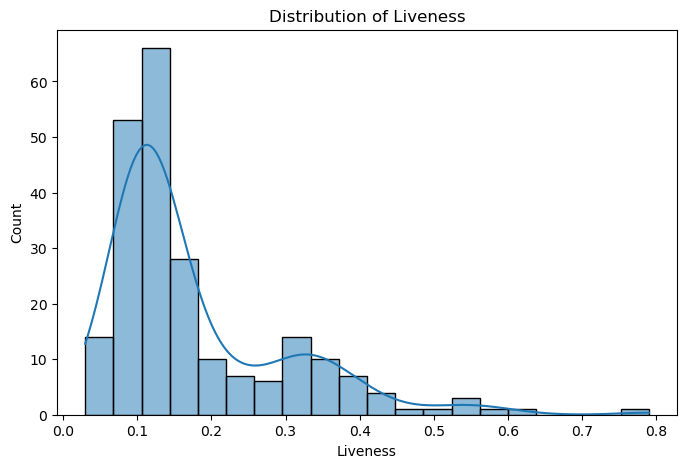

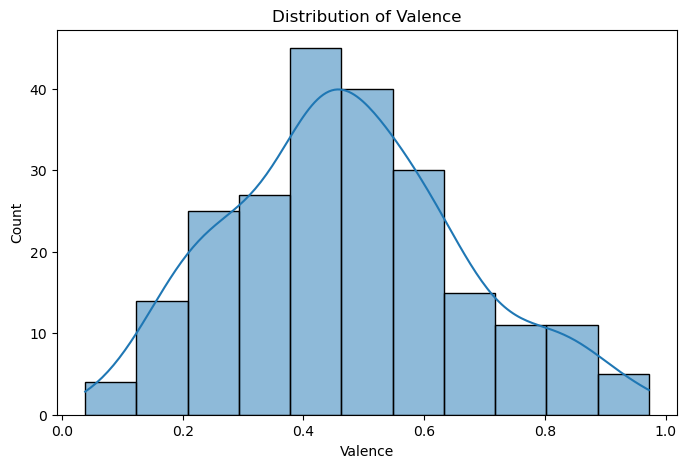

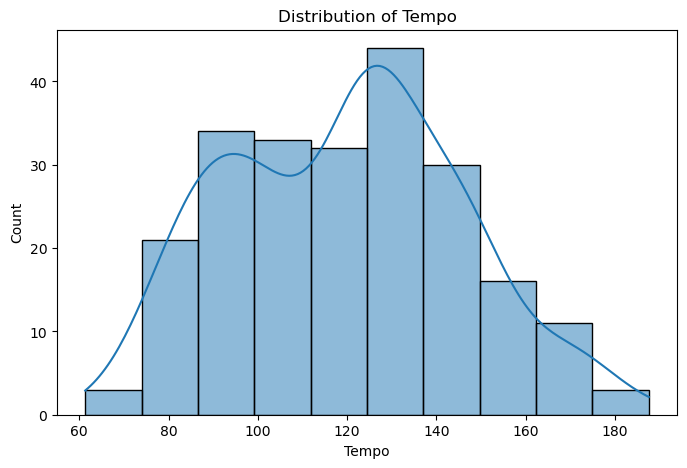

In [24]:
for feature in features:
    plt.figure(figsize = (8,5))
    sns.histplot(df[feature],kde = True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
features = ['Energy','Danceability','Acousticness','Loudness','Liveness','Valence','Tempo']

In [27]:
X = df[features]
y = df['Popularity']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
pram_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), pram_grid, refit=True, verbose=2, cv=5)

In [50]:
grid_search_rf.fit(X_train_scaled,y_train)

best_params_rf = grid_search_rf.best_params_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

In [52]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=50, random_state=42)

In [53]:

y_pred_best_rf = best_rf_model.predict(X_test_scaled)

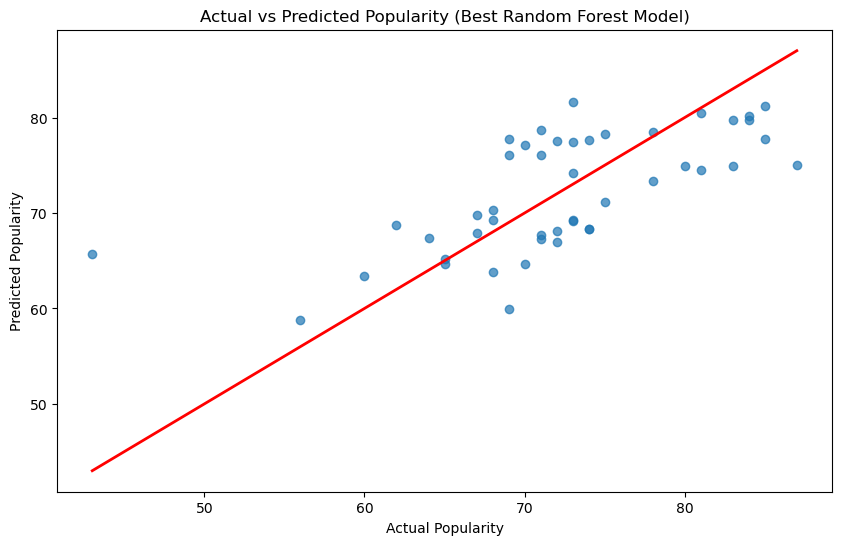

In [54]:
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()

In [60]:
result = r2_score(y_test,y_pred_best_rf)
result

0.4350713109764036